#  Титаник

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Загрузка данных



In [3]:
data = pd.read_csv('titanic_data.csv', index_col='PassengerId')

In [4]:
basic_features = data.columns

y = pd.read_csv('titanic_surv.csv')
y.index = data.index

print(f'Всего {len(data)} пассажиров в выборке')
data.head()

Всего 891 пассажиров в выборке


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
y.head()

,Survived
PassengerId,
1,0
2,1
3,1
4,1
5,0


In [6]:
data = data.join(y)
data.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
PassengerId,,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


## Исследование датасета


Кол-во мужчин и женщин:
male      577
female    314
Name: Sex, dtype: int64
Распределение по классам пассажиров:
3    0.551066
1    0.242424
2    0.206510
Name: Pclass, dtype: float64
Доля выживших мужчин и женщин к общему числу:
female    0.742038
male      0.188908
Name: Sex, dtype: float64
Доля выжевших по классам:
1    0.629630
2    0.472826
3    0.242363
Name: Pclass, dtype: float64


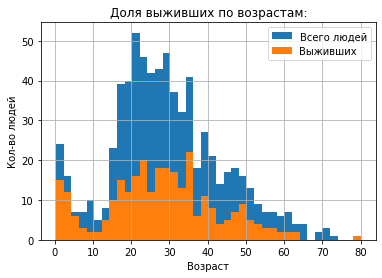

In [42]:
# Количество мужчин и женщин:
print("Кол-во мужчин и женщин:")
print(data.Sex.value_counts())

# Распределение по классам пассажиров
print("Распределение по классам пассажиров:")
print(data.Pclass.value_counts(normalize = True))

# Доля выживших мужчин и женщин к общему числу:
print("Доля выживших мужчин и женщин к общему числу:")
print(data[data.Survived == 1].Sex.value_counts()/data.Sex.value_counts())

# Доля выживших по классам:
print("Доля выжевших по классам:")
print(data[data.Survived == 1].Pclass.value_counts()/data.Pclass.value_counts())




# Доля выживших по возрастам:
data.Age.hist(bins = 40)
data[data.Survived == 1].Age.hist(bins = 40);
plt.title('Доля выживших по возрастам:')
plt.xlabel('Возраст')
plt.ylabel('Кол-во людей')
plt.legend(['Всего людей', 'Выживших'])

## Заполнение пропусков в данных

In [43]:
data.columns[data.isna().any()].tolist()

['Age', 'Cabin', 'Embarked']

Для простоты заполним все пропуски в категориальных колонках новым классом "0", а в числовой колонке Age --- медианным значением. 

In [44]:
data.loc[:, ['Cabin', 'Embarked']] = data.loc[:, ['Cabin', 'Embarked']].fillna('0')
data['Age'] = data['Age'].fillna(data['Age'].median())

## Подготовка плана тестирования

In [163]:
from sklearn.model_selection import train_test_split
data_train, data_test = train_test_split(data, test_size=0.3)

## Выделение новых признаков

In [164]:
data

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
PassengerId,,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S,0
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S,1
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S,0
...,...,...,...,...,...,...,...,...,...,...,...
887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,0,S,0
888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1
889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,0,S,0


In [165]:
data['Cabin']

PassengerId
1         0
2       C85
3         0
4      C123
5         0
       ... 
887       0
888     B42
889       0
890    C148
891       0
Name: Cabin, Length: 891, dtype: object

Тип кабины может иметь значение

In [166]:
def get_cabin_letter(row):
    return row['Cabin'][0]

data_train['cabin_type'] = data_train.apply(get_cabin_letter, axis=1)

<ipython-input-166-1be4cc8b452a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train['cabin_type'] = data_train.apply(get_cabin_letter, axis=1)


Разделим на малчиков и мужчин

In [167]:
def get_boys(row): #rename this function appropriately
    return 'boy' if row['Sex'] == 'male' and row["Age"] < 15 else row['Sex']

data_train['Sex_and_age'] = data_train.apply(get_boys, axis=1)

<ipython-input-167-72db30572fb6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train['Sex_and_age'] = data_train.apply(get_boys, axis=1)


## Кодирование категориальных признаков и обработка данных

In [168]:
data_train

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,cabin_type,Sex_and_age
PassengerId,,,,,,,,,,,,,
868,1,"Roebling, Mr. Washington Augustus II",male,31.0,0,0,PC 17590,50.4958,A24,S,0,A,male
81,3,"Waelens, Mr. Achille",male,22.0,0,0,345767,9.0000,0,S,0,0,male
204,3,"Youseff, Mr. Gerious",male,45.5,0,0,2628,7.2250,0,C,0,0,male
866,2,"Bystrom, Mrs. (Karolina)",female,42.0,0,0,236852,13.0000,0,S,1,0,female
344,2,"Sedgwick, Mr. Charles Frederick Waddington",male,25.0,0,0,244361,13.0000,0,S,0,0,male
...,...,...,...,...,...,...,...,...,...,...,...,...,...
648,1,"Simonius-Blumer, Col. Oberst Alfons",male,56.0,0,0,13213,35.5000,A26,C,1,A,male
732,3,"Hassan, Mr. Houssein G N",male,11.0,0,0,2699,18.7875,0,C,0,0,boy
853,3,"Boulos, Miss. Nourelain",female,9.0,1,1,2678,15.2458,0,C,0,0,female


In [169]:
#Заменим число в столбце Класса на строку, чтобы сделать ее категориальным признаком
data_train['Pclass'] = data_train['Pclass'].astype('category')

data_train = pd.get_dummies(data_train.drop(columns=['Name', 'Ticket', 'Cabin', "Sex"]))

<ipython-input-169-5ef40b78a44c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train['Pclass'] = data_train['Pclass'].astype('category')


In [170]:
data_train

,Age,SibSp,Parch,Fare,Survived,Pclass_1,Pclass_2,Pclass_3,Embarked_0,Embarked_C,...,cabin_type_A,cabin_type_B,cabin_type_C,cabin_type_D,cabin_type_E,cabin_type_F,cabin_type_G,Sex_and_age_boy,Sex_and_age_female,Sex_and_age_male
PassengerId,,,,,,,,,,,,,,,,,,,,,
868,31.0,0,0,50.4958,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
81,22.0,0,0,9.0000,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
204,45.5,0,0,7.2250,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1
866,42.0,0,0,13.0000,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
344,25.0,0,0,13.0000,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
648,56.0,0,0,35.5000,1,1,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1
732,11.0,0,0,18.7875,0,0,0,1,0,1,...,0,0,0,0,0,0,0,1,0,0
853,9.0,1,1,15.2458,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,1,0


## Обучение baseline-модели


In [171]:
from sklearn import linear_model
from sklearn.model_selection import cross_val_score

model_1 = linear_model.Ridge(alpha=.5)
scores = cross_val_score(model_1, data_train.drop(columns='Survived'), data_train.Survived, cv=5)
scores

array([0.34981013, 0.36991586, 0.47793674, 0.29466584, 0.31150401])

## Дополнительное моделирование

In [172]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score


#Выберем лучшую и для нее произведем подбор гиперпараметров
model_2 = KNeighborsClassifier()
scores = cross_val_score(model_2, data_train.drop(columns='Survived'), data_train.Survived, cv=5)
print(scores, scores.mean(), scores.std())

model_3 = DecisionTreeClassifier()
scores = cross_val_score(model_3, data_train.drop(columns='Survived'), data_train.Survived, cv=5)
print(scores, scores.mean(), scores.std())

model_4 = RandomForestClassifier()
scores = cross_val_score(model_4, data_train.drop(columns='Survived'), data_train.Survived, cv=5)
print(scores, scores.mean(), scores.std())


# Для 4 модели произведем подбор гиперпараметров

param_grid = {
    'n_estimators':[20, 50, 100],
    'max_features' : ["auto", "sqrt", "log2"],
    'class_weight' : ["balanced", "balanced_subsample"]
}

clf = GridSearchCV(model_4, param_grid)

clf.fit(data_train.drop(columns='Survived'), data_train.Survived)

print(clf.best_params_, clf.best_score_)



[0.672      0.72       0.68       0.61290323 0.65322581] 0.667625806451613 0.03497779643568699
[0.704      0.72       0.824      0.73387097 0.74193548] 0.7447612903225806 0.04166524140469048
[0.768      0.792      0.816      0.76612903 0.80645161] 0.7897161290322581 0.020020368400319073
{'class_weight': 'balanced_subsample', 'max_features': 'log2', 'n_estimators': 20} 0.8073677419354839


## Результаты моделирования


In [173]:
# Нужно привести data_test к такому же виду как data_train
data_test['cabin_type'] = data_test.apply(get_cabin_letter, axis=1)
data_test['Sex_and_age'] = data_test.apply(get_boys, axis=1)
data_test['Pclass'] = data_test['Pclass'].astype('category')
data_test = pd.get_dummies(data_test.drop(columns=['Name', 'Ticket', 'Cabin', "Sex"]))

<ipython-input-173-d4132013c321>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test['cabin_type'] = data_test.apply(get_cabin_letter, axis=1)
<ipython-input-173-d4132013c321>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test['Sex_and_age'] = data_test.apply(get_boys, axis=1)
<ipython-input-173-d4132013c321>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati

In [182]:
data_train['cabin_type_T'] = 0

In [186]:
model_final = RandomForestClassifier(class_weight = 'balanced_subsample', max_features = 'auto', n_estimators = 50)
scores = cross_val_score(model_final, data_train.drop(columns='Survived'), data_train.Survived, cv=5)
print(scores, scores.mean(), scores.std())


model_final.fit(data_train.drop(columns='Survived'), data_train.Survived)
y_test = model_final.predict(data_test.drop(columns='Survived'))
print(roc_auc_score(data_test.Survived, y_test))

[0.744      0.8        0.816      0.76612903 0.84677419] 0.7945806451612902 0.0362773224026746
0.5051510989010989
